In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
from math import sqrt


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,KFold
from sklearn.neural_network import MLPRegressor

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler,StandardScaler


Loading of data

In [2]:
data = pd.read_excel('train_data.xlsx')
df=data
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


Looking for categorical columns

In [3]:
df.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [4]:
print(df['StateHoliday'].value_counts())

0    951594
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64


Data manipulation techniques like, One-Hot Encoding

In [5]:
df = pd.get_dummies(df, columns = ['StateHoliday'])
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,2,2015-06-30,5735,568,1,1,0,1,0,0,0
1,2,2,2015-06-30,9863,877,1,1,0,1,0,0,0
2,3,2,2015-06-30,13261,1072,1,1,1,1,0,0,0
3,4,2,2015-06-30,13106,1488,1,1,0,1,0,0,0
4,5,2,2015-06-30,6635,645,1,1,0,1,0,0,0


One-Hot Encoding

In [6]:
df.dtypes

Store                      int64
DayOfWeek                  int64
Date              datetime64[ns]
Sales                      int64
Customers                  int64
Open                       int64
Promo                      int64
SchoolHoliday              int64
StateHoliday_0             uint8
StateHoliday_a             uint8
StateHoliday_b             uint8
StateHoliday_c             uint8
dtype: object

In [7]:
df['day'] = pd.to_datetime(df['Date']).dt.day
df['year'] = pd.to_datetime(df['Date']).dt.year
df['month'] = pd.to_datetime(df['Date']).dt.month

In [8]:
all_df = df
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,day,year,month
0,1,2,2015-06-30,5735,568,1,1,0,1,0,0,0,30,2015,6
1,2,2,2015-06-30,9863,877,1,1,0,1,0,0,0,30,2015,6
2,3,2,2015-06-30,13261,1072,1,1,1,1,0,0,0,30,2015,6
3,4,2,2015-06-30,13106,1488,1,1,0,1,0,0,0,30,2015,6
4,5,2,2015-06-30,6635,645,1,1,0,1,0,0,0,30,2015,6


In [9]:
all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,day,year,month
0,1,2,2015-06-30,5735,568,1,1,0,1,0,0,0,30,2015,6
1,2,2,2015-06-30,9863,877,1,1,0,1,0,0,0,30,2015,6
2,3,2,2015-06-30,13261,1072,1,1,1,1,0,0,0,30,2015,6
3,4,2,2015-06-30,13106,1488,1,1,0,1,0,0,0,30,2015,6
4,5,2,2015-06-30,6635,645,1,1,0,1,0,0,0,30,2015,6


In [10]:
df.drop('Date', axis=1,inplace=True)

In [11]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,day,year,month
0,1,2,5735,568,1,1,0,1,0,0,0,30,2015,6
1,2,2,9863,877,1,1,0,1,0,0,0,30,2015,6
2,3,2,13261,1072,1,1,1,1,0,0,0,30,2015,6
3,4,2,13106,1488,1,1,0,1,0,0,0,30,2015,6
4,5,2,6635,645,1,1,0,1,0,0,0,30,2015,6


In [12]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'day', 'year', 'month'],
      dtype='object')

for transform the variables by using data manipulation techniques like, One-Hot Encoding get_dummies function is used

EDA (Exploratory Data Analysis)

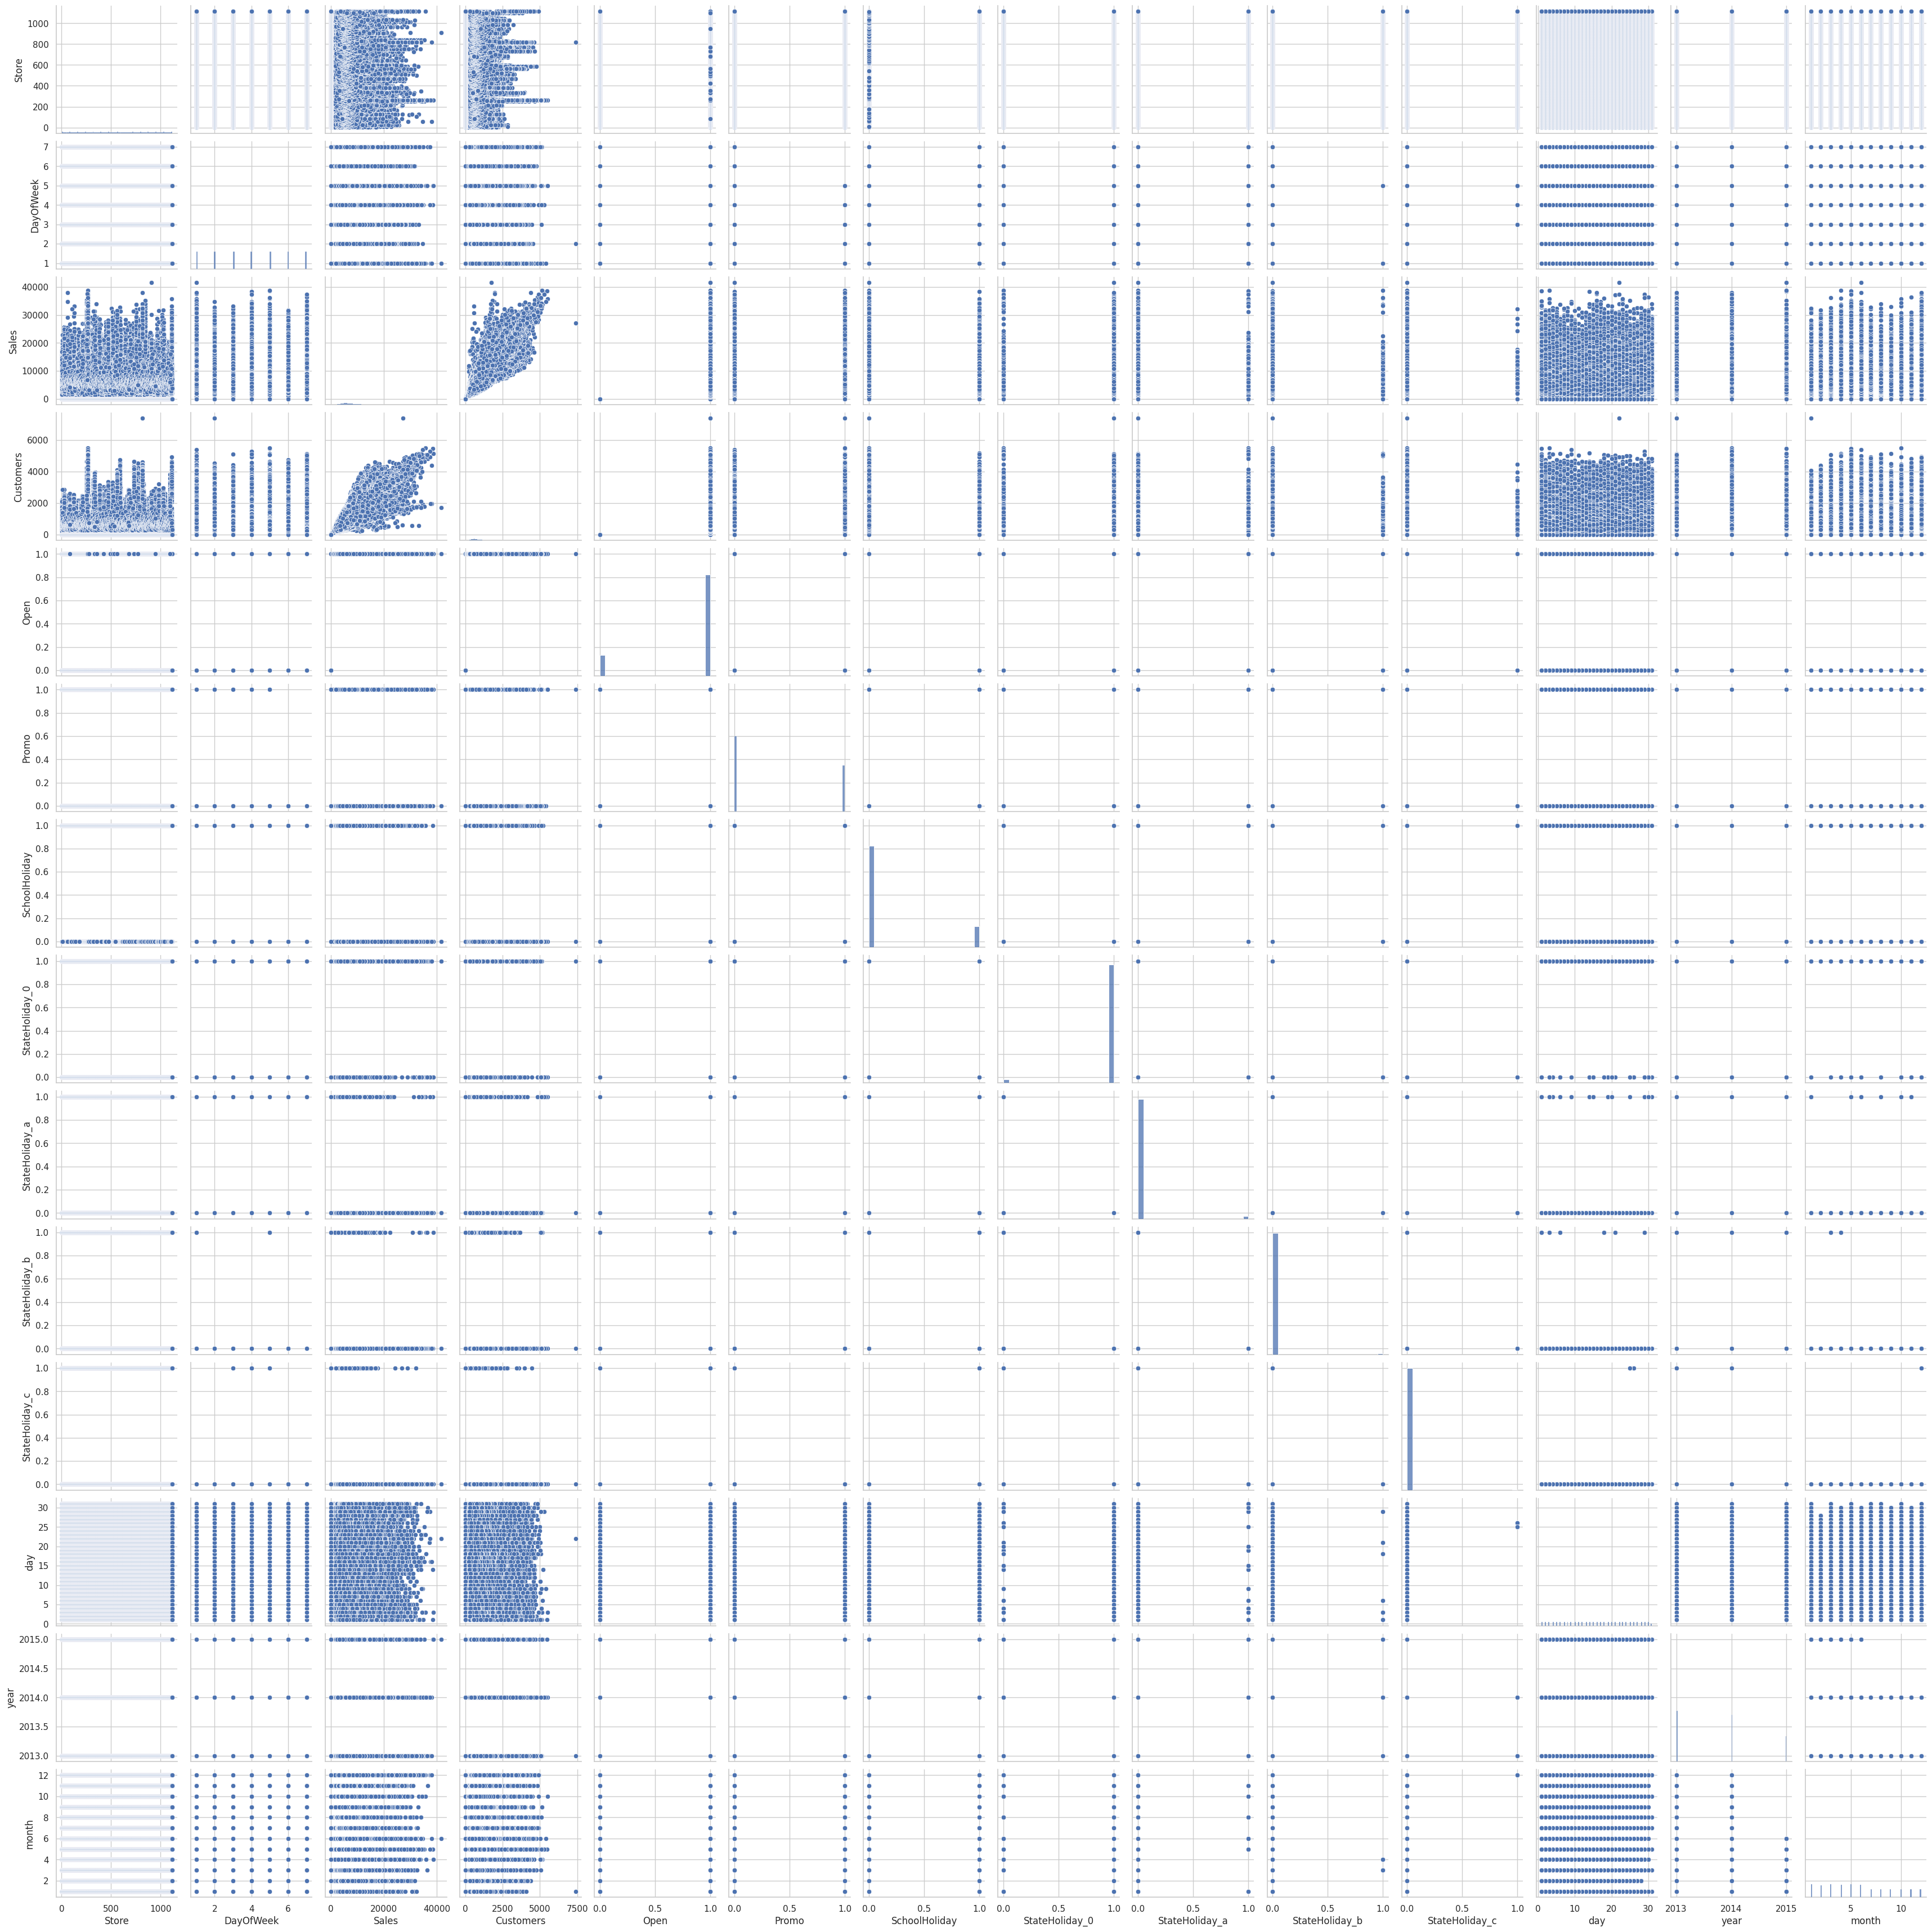

In [ ]:
sns.pairplot(df)
plt.show()

In [13]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,day,year,month
count,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000
mean,558.444843,3.998282,5760.843202,632.770227,0.828585,0.380183,0.171928,0.968402,0.020618,0.006808,0.004172,15.692335,2013.791217,5.806196
std,321.909907,2.000138,3857.573443,465.401378,0.376871,0.485432,0.377318,0.174929,0.142101,0.082230,0.064459,8.781894,0.758915,3.376927
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2013.000000,1.000000
25%,280.000000,2.000000,3705.000000,403.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,8.000000,2013.000000,3.000000
50%,558.000000,4.000000,5731.000000,609.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.000000,2014.000000,5.000000
75%,838.000000,6.000000,7847.000000,838.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,23.000000,2014.000000,9.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,2015.000000,12.000000


In [14]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'day', 'year', 'month'],
      dtype='object')

Apply Linear Regression Model

In [15]:
X = df[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo','SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'day', 'year', 'month']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Determine which metric makes more sense
if rmse < mae:
    print("RMSE makes more sense.")
    print(f"RMSE: {rmse}")
else:
    print("MAE makes more sense.")
    print(f"MAE: {mae}")

MAE makes more sense.
MAE: 979.320354229469


In [16]:
print(df['Store'].value_counts())

1      911
726    911
708    911
709    911
713    911
      ... 
159    727
637    727
636    727
633    727
155    727
Name: Store, Length: 1115, dtype: int64


Training separate model for each store.

In [ ]:
# Get the unique values in the categorical column
store_id = df['Store'].unique()

# Loop through each category and train a separate linear regression model
for store in store_id:
    # Filter the DataFrame for the current category
    category_df = df[df['Store'] == store]

    X= category_df[['DayOfWeek', 'Customers', 'Open', 'Promo','SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'day', 'year', 'month']]
    y= category_df['Sales']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model1 = LinearRegression().fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model1.predict(X_test)

    # Calculate RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Calculate MAE (Mean Absolute Error)
    mae = mean_absolute_error(y_test, y_pred)

    # Determine which metric makes more sense
    print(f'For Store with Model where Store_id = {store} ')
    if rmse < mae:
        print("RMSE makes more sense.")
        print(f"RMSE: {rmse}")
    else:
        print("MAE makes more sense.")
        print(f"MAE: {mae}")



For Store with Model where Store_id = 1 
MAE makes more sense.
MAE: 197.48002656278868
For Store with Model where Store_id = 2 
MAE makes more sense.
MAE: 303.01371676913055
For Store with Model where Store_id = 3 
MAE makes more sense.
MAE: 375.1339069769568
For Store with Model where Store_id = 4 
MAE makes more sense.
MAE: 298.06451258794885
For Store with Model where Store_id = 5 
MAE makes more sense.
MAE: 337.2782625757887
For Store with Model where Store_id = 6 
MAE makes more sense.
MAE: 257.2434350654261
For Store with Model where Store_id = 7 
MAE makes more sense.
MAE: 531.4808400108033
For Store with Model where Store_id = 8 
MAE makes more sense.
MAE: 327.31044498265595
For Store with Model where Store_id = 9 
MAE makes more sense.
MAE: 243.85987376238964
For Store with Model where Store_id = 10 
MAE makes more sense.
MAE: 253.01363477555117
For Store with Model where Store_id = 11 
MAE makes more sense.
MAE: 480.29193594553885
For Store with Model where Store_id = 12 
MAE

For linear regression, the best accuracy metric is the mean squared error (MSE). This measures the average squared difference between the predicted and actual values. Other popular metrics include mean absolute error (MAE), root mean squared error (RMSE), and R-squared.

The Models specific to store id's performs better compared to overall model as the number of samples for specific store are less and the model behaves good with specific defined features

Ensemble  Model

In [ ]:
# Split the dataset into training and testing sets
X = df[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo','SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'day', 'year', 'month']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base linear regression model
base_model = LinearRegression()

# Create a BaggingRegressor with the base model
n_estimators = 10  # Number of base models in the ensemble
bagging_regressor = BaggingRegressor(base_model, n_estimators=n_estimators, random_state=42)

# Train the ensemble model
bagging_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_regressor.predict(X_test)

# Calculate the Mean Squared Error (MSE) as an evaluation metric
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

if mse < mae:
  print("RMSE makes more sense.")
  print(f"RMSE: {mse}")
else:
  print("MAE makes more sense.")
  print(f"MAE: {mae}")



Mean Squared Error: 2141275.7737798123
Mean Absolute Error: 979.253956315207
MAE makes more sense.
MAE: 979.253956315207


 Accuracy trained with ensemble is similar to the accuracy with linear regression

In [ ]:
## Regularized Regression

X = df[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo','SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'day', 'year', 'month']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression Example
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength)
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
print("Ridge Mean Squared Error:", ridge_mse)
print("Ridge Mean Absolute Error:", ridge_mae)

# Lasso Regression Example
lasso_reg = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength)
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
print("Lasso Mean Squared Error:", lasso_mse)
print("Lasso Mean Absolute Error:", lasso_mae)

Ridge Mean Squared Error: 2141255.010390859
Ridge Mean Absolute Error: 979.319827028195
Lasso Mean Squared Error: 2141748.3099275455
Lasso Mean Absolute Error: 979.576630185042


 Accuracy trained with Regularised regression alittle better than other regression models

In [17]:
 # When store is closed, sales = 0
 df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,day,year,month
0,1,2,5735,568,1,1,0,1,0,0,0,30,2015,6
1,2,2,9863,877,1,1,0,1,0,0,0,30,2015,6
2,3,2,13261,1072,1,1,1,1,0,0,0,30,2015,6
3,4,2,13106,1488,1,1,0,1,0,0,0,30,2015,6
4,5,2,6635,645,1,1,0,1,0,0,0,30,2015,6


When Sales =0 means Stores closed as data cleaning

In [18]:
df_sales = df[df['Sales'] != 0]
df_sales.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,day,year,month
0,1,2,5735,568,1,1,0,1,0,0,0,30,2015,6
1,2,2,9863,877,1,1,0,1,0,0,0,30,2015,6
2,3,2,13261,1072,1,1,1,1,0,0,0,30,2015,6
3,4,2,13106,1488,1,1,0,1,0,0,0,30,2015,6
4,5,2,6635,645,1,1,0,1,0,0,0,30,2015,6


Linear Regression Model

In [ ]:
X = df_sales[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo','SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'day', 'year', 'month']]
y = df_sales['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Squared Error: {rmse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Determine which metric makes more sense
if rmse < mae:
    print("RMSE makes more sense.")
    print(f"RMSE: {rmse}")
else:
    print("MAE makes more sense.")
    print(f"MAE: {mae}")

Mean Squared Error: 1600.8923166180593
Mean Absolute Error: 1146.7174465372661
MAE makes more sense.
MAE: 1146.7174465372661


The Model without sales = 0 dataset provides better model than the dataset which contains sales = 0

In [ ]:
X = df_sales[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo','SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'day', 'year', 'month']]
y = df_sales['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3,5,7,9,11],
}

# Create a Random Forest Regressor
regressor = RandomForestRegressor(random_state=0)

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the Random Forest Regressor with the best hyperparameters on the training data
best_regressor = RandomForestRegressor(random_state=0, **best_params)
best_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Best Hyperparameters: {'max_depth': 11, 'n_estimators': 100}
Mean Squared Error: 1720549.507183243
R-squared: 0.8230262317378175


Non-Linear Regressors like Random Forest

In [ ]:
# Get the unique values in the categorical column
store_id = df['Store'].unique()

# Loop through each category and train a separate linear regression model
for store in store_id:
    # Filter the DataFrame for the current category
    category_df = df[df['Store'] == store]

    X= category_df[['DayOfWeek', 'Customers', 'Open', 'Promo','SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'day', 'year', 'month']]
    y= category_df['Sales']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define hyperparameters to tune
    param_grid = {
      'n_estimators': [50, 100, 150],
      'max_depth': [3,5,7,9,11],
    }

    # Create a Random Forest Regressor
    regressor = RandomForestRegressor(random_state=0)

    # Perform grid search with cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Train the Random Forest Regressor with the best hyperparameters on the training data
    best_regressor = RandomForestRegressor(random_state=0, **best_params)
    best_regressor.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = best_regressor.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'For Store with Model where Store_id = {store} ')
    print("Best Hyperparameters:", best_params)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")



For Store with Model where Store_id = 1 
Best Hyperparameters: {'max_depth': 9, 'n_estimators': 100}
Mean Squared Error: 79493.15056193226
R-squared: 0.9822518039910937
For Store with Model where Store_id = 2 
Best Hyperparameters: {'max_depth': 11, 'n_estimators': 100}
Mean Squared Error: 76874.80777760764
R-squared: 0.9867312866109659
For Store with Model where Store_id = 3 
Best Hyperparameters: {'max_depth': 11, 'n_estimators': 100}
Mean Squared Error: 187975.27040615026
R-squared: 0.9833111519700685
For Store with Model where Store_id = 4 
Best Hyperparameters: {'max_depth': 9, 'n_estimators': 100}
Mean Squared Error: 166015.24733972206
R-squared: 0.9903519317181062
For Store with Model where Store_id = 5 
Best Hyperparameters: {'max_depth': 11, 'n_estimators': 100}
Mean Squared Error: 79468.16368430099
R-squared: 0.9862719163371932
For Store with Model where Store_id = 6 
Best Hyperparameters: {'max_depth': 11, 'n_estimators': 50}
Mean Squared Error: 94249.36431584317
R-squared: 

In [19]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,day,year,month
0,1,2,5735,568,1,1,0,1,0,0,0,30,2015,6
1,2,2,9863,877,1,1,0,1,0,0,0,30,2015,6
2,3,2,13261,1072,1,1,1,1,0,0,0,30,2015,6
3,4,2,13106,1488,1,1,0,1,0,0,0,30,2015,6
4,5,2,6635,645,1,1,0,1,0,0,0,30,2015,6


From the performance of Linear Model and Non-Linear Model from the previous observations, by comparing the performance of Linear Model and Non-Linear Model from the previous observations non-linear models can capture more complex relationships between features but there may be chances of overfitting

In [20]:
df1 = data
ts = df1[['Date','Sales']]
ts.set_index('Date', inplace=True)
# df1.head()
ts.head()

,Sales
Date,
2015-06-30,5735
2015-06-30,9863
2015-06-30,13261
2015-06-30,13106
2015-06-30,6635


Time Series Model

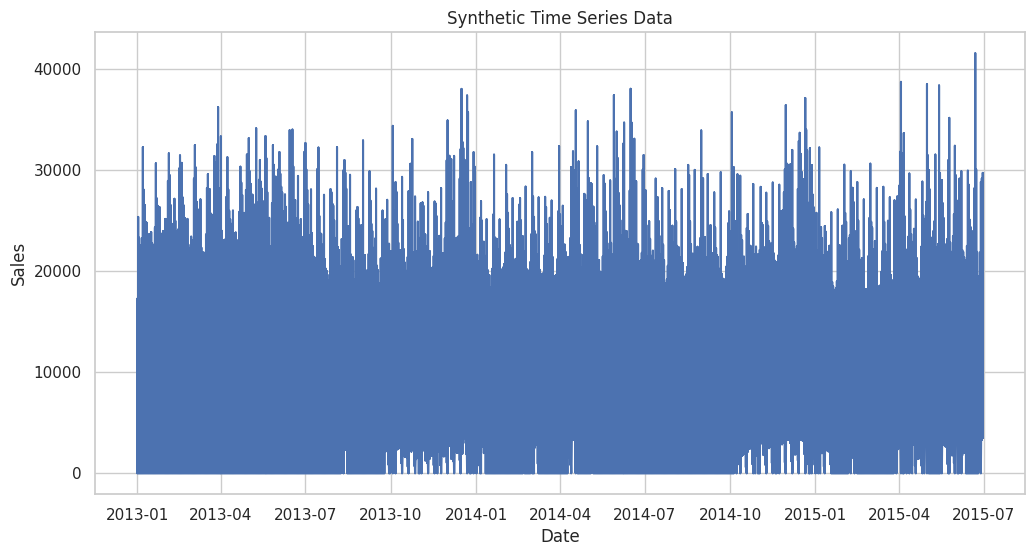

In [21]:
df=ts
# # Plot the synthetic time series data
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Synthetic Time Series Data')
plt.show()

In [21]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


### Time Series model

In [22]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [23]:
ts = df1[['Store', 'Date', 'Sales']]
ts.head()

,Store,Date,Sales
0,1,2015-06-30,5735
1,2,2015-06-30,9863
2,3,2015-06-30,13261
3,4,2015-06-30,13106
4,5,2015-06-30,6635


In [24]:
ts1=ts[['Date', 'Sales']]
ts1.head()

,Date,Sales
0,2015-06-30,5735
1,2015-06-30,9863
2,2015-06-30,13261
3,2015-06-30,13106
4,2015-06-30,6635


<ipython-input-38-81f4bd6323ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts1['Date'] = pd.to_datetime(ts1['Date'])


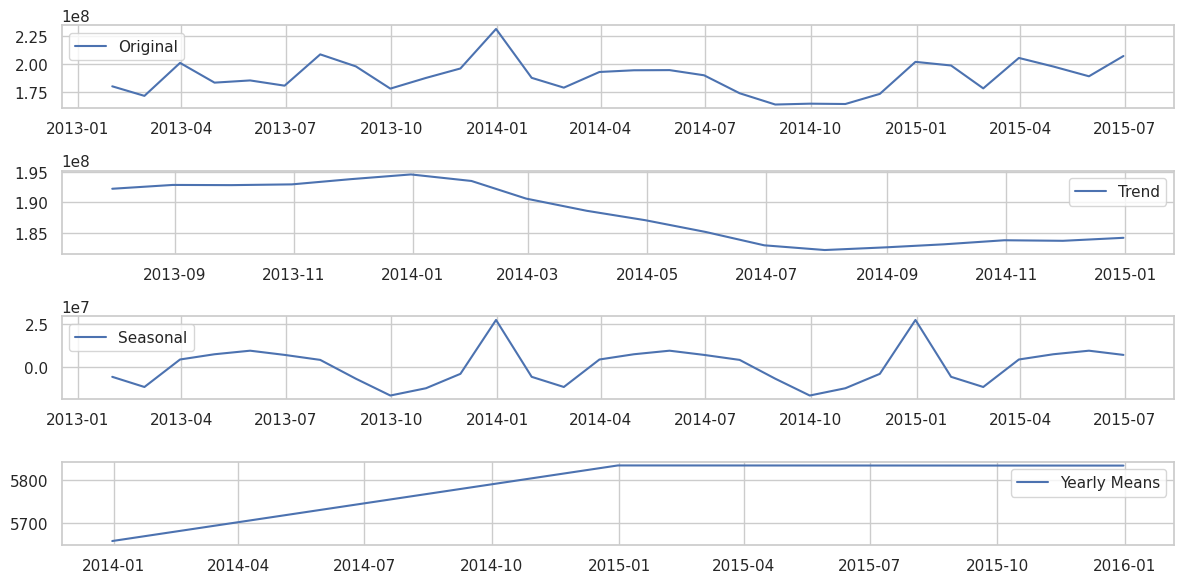

In [ ]:
ts1['Date'] = pd.to_datetime(ts1['Date'])
ts1.set_index('Date', inplace=True)

resampled_data = ts1['Sales'].resample('M').sum()

# Decompose the time series into trend, seasonal, and residual components
decomposition = sm.tsa.seasonal_decompose(resampled_data, model='additive')

# Extract the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the original time series, trend, and seasonal components
plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(resampled_data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

# Plot the monthly means for each year to visualize yearly trends
yearly_means = ts1['Sales'].resample('Y').mean()
plt.subplot(414)
plt.plot(yearly_means, label='Yearly Means')
plt.legend(loc='best')

# Adjust the plot layout and show the plot
plt.tight_layout()
plt.show()


In [25]:
ts1 = df1[['Store', 'Date', 'Sales']]
ts1.head()

,Store,Date,Sales
0,1,2015-06-30,5735
1,2,2015-06-30,9863
2,3,2015-06-30,13261
3,4,2015-06-30,13106
4,5,2015-06-30,6635


In [ ]:
# Get the unique values in the categorical column
store_id = ts1['Store'].unique()

# Loop through each category and train a separate linear regression model
for store in store_id:
    # Filter the DataFrame for the current category
    category_df = ts1[ts1['Store'] == store]

    category_df['Date'] = pd.to_datetime(category_df['Date'])
    category_df.set_index('Date', inplace=True)

    # Resample the data to monthly frequency
    # You can choose other frequencies like 'D' for daily or 'W' for weekly.
    resampled_data = category_df['Sales'].resample('M').sum()

    # Decompose the time series into trend, seasonal, and residual components
    decomposition = sm.tsa.seasonal_decompose(resampled_data, model='additive')

    # Extract the trend, seasonal, and residual components
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot the original time series, trend, and seasonal components
    plt.figure(figsize=(12, 6))
    plt.subplot(411)
    plt.plot(resampled_data, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonal')
    plt.legend(loc='best')

    # Plot the monthly means for each year to visualize yearly trends
    yearly_means = category_df['Sales'].resample('Y').mean()
    plt.subplot(414)
    plt.plot(yearly_means, label='Yearly Means')
    plt.legend(loc='best')

    # Adjust the plot layout and show the plot

    print(f'\n\n\n\n\n ---------------------- Plot for Storeid : {store}')
    plt.tight_layout()
    plt.show()



Output hidden; open in https://colab.research.google.com to view.

In [26]:
ts.head()

,Store,Date,Sales
0,1,2015-06-30,5735
1,2,2015-06-30,9863
2,3,2015-06-30,13261
3,4,2015-06-30,13106
4,5,2015-06-30,6635


In [27]:
ts1.head()

,Store,Date,Sales
0,1,2015-06-30,5735
1,2,2015-06-30,9863
2,3,2015-06-30,13261
3,4,2015-06-30,13106
4,5,2015-06-30,6635


Traditional model

In [28]:
ts1['Date'] = pd.to_datetime(ts1['Date'])
ts1['day'] = pd.to_datetime(ts1['Date']).dt.day
ts1['year'] = pd.to_datetime(ts1['Date']).dt.year
ts1['month'] = pd.to_datetime(ts1['Date']).dt.month
ts1.dtypes

<ipython-input-28-cabd7c286d89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts1['Date'] = pd.to_datetime(ts1['Date'])
<ipython-input-28-cabd7c286d89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts1['day'] = pd.to_datetime(ts1['Date']).dt.day
<ipython-input-28-cabd7c286d89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

Store             int64
Date     datetime64[ns]
Sales             int64
day               int64
year              int64
month             int64
dtype: object

In [29]:
ts1.columns
temp = ts1[['day', 'month', 'year','Sales']]
temp.head()

,day,month,year,Sales
0,30,6,2015,5735
1,30,6,2015,9863
2,30,6,2015,13261
3,30,6,2015,13106
4,30,6,2015,6635


In [30]:
temp1 = temp[temp['year'] != 2015]
temp2 = temp[temp['year'] == 2015]

In [31]:
temp1.head()

,day,month,year,Sales
201815,31,12,2014,2605
201816,31,12,2014,2269
201817,31,12,2014,3804
201818,31,12,2014,10152
201819,31,12,2014,1830


In [32]:
temp2.head()

,day,month,year,Sales
0,30,6,2015,5735
1,30,6,2015,9863
2,30,6,2015,13261
3,30,6,2015,13106
4,30,6,2015,6635


In [33]:
X_train = temp1[['day', 'month', 'year']]
y_train = temp1['Sales']

X_test = temp2[['day', 'month', 'year']]
y_test = temp2['Sales']

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(780829, 3)
(201815, 3)
(780829,)
(201815,)


In [ ]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 15057556.345455494
Mean Absolute Error (MAE): 2924.7153337504405


LSTM Model

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(780829, 3)
(201815, 3)
(780829,)
(201815,)


In [ ]:
# Create a sequential model
model = Sequential()

# Add an LSTM layer with the desired number of units and input shape
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))

# Add a Dense layer with one output unit (for regression)
model.add(Dense(units=1))

# Compile the model with MSE and MAE as loss functions
model.compile(optimizer='adam', loss=['mse', 'mae'], metrics=['mae'])  # You can use both MSE and MAE as loss functions

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {test_loss[0]}')
print(f'Test Loss (MAE): {test_loss[1]}')

# You can also make predictions using the trained model
predictions = model.predict(X_test)

Epoch 1/20
24401/24401 [==============================] - 108s 4ms/step - loss: 41531500.0000 - mae: 5354.5142 - val_loss: 36711008.0000 - val_mae: 5075.8677
Epoch 2/20
24401/24401 [==============================] - 95s 4ms/step - loss: 30806016.0000 - mae: 4582.3335 - val_loss: 27213308.0000 - val_mae: 4333.9902
Epoch 3/20
24401/24401 [==============================] - 103s 4ms/step - loss: 22930014.0000 - mae: 3853.9211 - val_loss: 20535432.0000 - val_mae: 3655.3987
Epoch 4/20
24401/24401 [==============================] - 93s 4ms/step - loss: 17850770.0000 - mae: 3269.1311 - val_loss: 16630955.0000 - val_mae: 3161.2295
Epoch 5/20
24401/24401 [==============================] - 94s 4ms/step - loss: 15427509.0000 - mae: 2958.0527 - val_loss: 15230810.0000 - val_mae: 2959.1572
Epoch 6/20
24401/24401 [==============================] - 103s 4ms/step - loss: 14877934.0000 - mae: 2889.2839 - val_loss: 15055788.0000 - val_mae: 2930.3967
Epoch 7/20
24401/24401 [==============================]

In [35]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,day,year,month
0,1,2,5735,568,1,1,0,1,0,0,0,30,2015,6
1,2,2,9863,877,1,1,0,1,0,0,0,30,2015,6
2,3,2,13261,1072,1,1,1,1,0,0,0,30,2015,6
3,4,2,13106,1488,1,1,0,1,0,0,0,30,2015,6
4,5,2,6635,645,1,1,0,1,0,0,0,30,2015,6


In [36]:
ts2 = all_df
ts2.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,day,year,month
0,1,2,5735,568,1,1,0,1,0,0,0,30,2015,6
1,2,2,9863,877,1,1,0,1,0,0,0,30,2015,6
2,3,2,13261,1072,1,1,1,1,0,0,0,30,2015,6
3,4,2,13106,1488,1,1,0,1,0,0,0,30,2015,6
4,5,2,6635,645,1,1,0,1,0,0,0,30,2015,6


In [37]:
ts2.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'day', 'year', 'month'],
      dtype='object')

In [38]:
# Select the features you want to use for clustering
X = ts2[['Sales', 'Customers']]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [39]:
# Determine the number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):  # You can adjust the range as needed
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

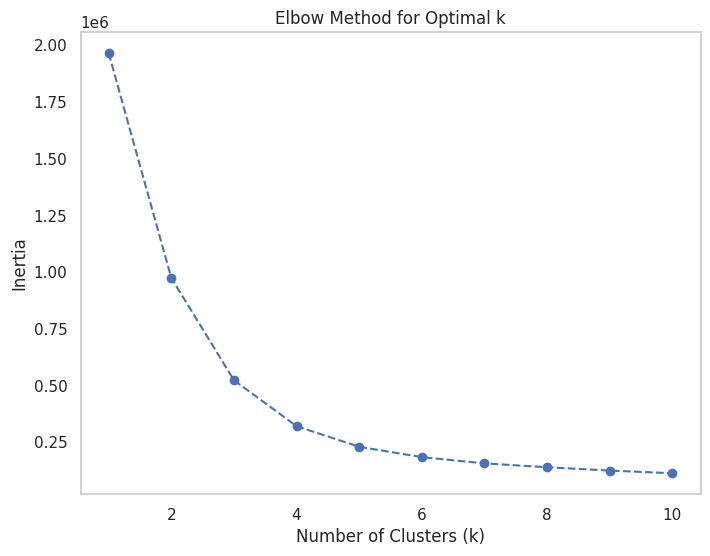

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


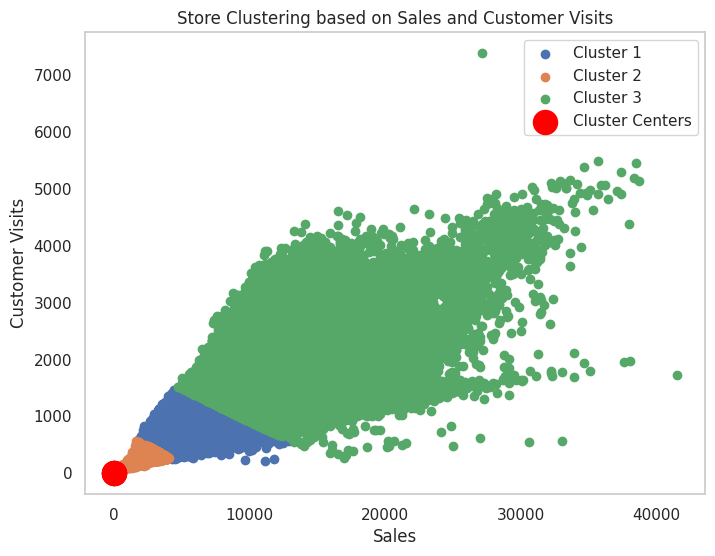

In [40]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Based on the Elbow Method, choose an optimal number of clusters (k)
# Let's say, for example, that the optimal k is 3

# Apply K-Means clustering with the chosen number of clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X_std)

# Add cluster labels to the original DataFrame
ts2['cluster'] = clusters

# Visualize the results
plt.figure(figsize=(8, 6))
for cluster in range(k):
    plt.scatter(ts2[ts2['cluster'] == cluster]['Sales'], ts2[ts2['cluster'] == cluster]['Customers'], label=f'Cluster {cluster + 1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Cluster Centers')
plt.title('Store Clustering based on Sales and Customer Visits')
plt.xlabel('Sales')
plt.ylabel('Customer Visits')
plt.legend()
plt.grid()
plt.show()


In [41]:
ts2.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,day,year,month,cluster
0,1,2,5735,568,1,1,0,1,0,0,0,30,2015,6,0
1,2,2,9863,877,1,1,0,1,0,0,0,30,2015,6,0
2,3,2,13261,1072,1,1,1,1,0,0,0,30,2015,6,2
3,4,2,13106,1488,1,1,0,1,0,0,0,30,2015,6,2
4,5,2,6635,645,1,1,0,1,0,0,0,30,2015,6,0


In [42]:
ts3 = ts2[['Sales', 'Customers','cluster']]
ts3.columns

Index(['Sales', 'Customers', 'cluster'], dtype='object')

In [42]:
cluster_models = {}
cluster_mses = {}

# Iterate over clusters and fit a regression model for each
for cluster in ts3['cluster'].unique():
    # Select data for the current cluster
    cluster_data = ts3[ts3['cluster'] == cluster]

    # Split data into features (X) and target (y)
    X = ts3[['Sales']]
    y = ts3['Customers']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Create a Linear Regression model for the cluster
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions using the model
    y_pred = model.predict(X_test)

    # Calculate MSE for the cluster
    mse = mean_squared_error(y_test, y_pred)

    # Store the model and MSE in the dictionary
    cluster_models[cluster] = model
    cluster_mses[cluster] = mse

# Print the MSE values for each cluster
for cluster, mse in cluster_mses.items():
    print(f"Cluster {cluster} - MSE: {mse}")

Cluster 0 - MSE: 42712.89586900532
Cluster 2 - MSE: 42712.89586900532
Cluster 1 - MSE: 42712.89586900532


Is it possible to have separate prediction models for each cluster? Compare results with the previous models.

In [43]:
ts2.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,day,year,month,cluster
0,1,2,5735,568,1,1,0,1,0,0,0,30,2015,6,0
1,2,2,9863,877,1,1,0,1,0,0,0,30,2015,6,0
2,3,2,13261,1072,1,1,1,1,0,0,0,30,2015,6,2
3,4,2,13106,1488,1,1,0,1,0,0,0,30,2015,6,2
4,5,2,6635,645,1,1,0,1,0,0,0,30,2015,6,0


In [44]:
ts2.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'day', 'year', 'month', 'cluster'],
      dtype='object')

In [ ]:
# Split the dataset into features (X) and target (y)
X = ts2[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'day', 'year', 'month', 'cluster']]
y = ts2['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional, but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the ANN model
model = tf.keras.Sequential()

# Add input layer
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_dim=X_train.shape[1]))

# Add hidden layers (you can fine-tune these)
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

# Add output layer
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the number of epochs and batch size (you can fine-tune these)
epochs = 5
batch_size = 32

# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model using RMSE
y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Make predictions
predictions = model.predict(X_test)


Epoch 1/5
24567/24567 [==============================] - 68s 3ms/step - loss: 1965787.2500 - val_loss: 1586349.2500
Epoch 2/5
24567/24567 [==============================] - 66s 3ms/step - loss: 1556310.6250 - val_loss: 1530778.6250
Epoch 3/5
24567/24567 [==============================] - 64s 3ms/step - loss: 1517944.7500 - val_loss: 1549033.2500
Epoch 4/5
24567/24567 [==============================] - 65s 3ms/step - loss: 1493697.6250 - val_loss: 1464282.2500
Epoch 5/5
6142/6142 [==============================] - 10s 2ms/step
Root Mean Squared Error (RMSE): 1219.4713725392073
6142/6142 [==============================] - 9s 2ms/step


In [45]:
ts2.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,day,year,month,cluster
0,1,2,5735,568,1,1,0,1,0,0,0,30,2015,6,0
1,2,2,9863,877,1,1,0,1,0,0,0,30,2015,6,0
2,3,2,13261,1072,1,1,1,1,0,0,0,30,2015,6,2
3,4,2,13106,1488,1,1,0,1,0,0,0,30,2015,6,2
4,5,2,6635,645,1,1,0,1,0,0,0,30,2015,6,0


In [ ]:
# Split the dataset into features (X) and target (y)
X = ts2[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'day', 'year', 'month']]
y = ts2['Sales']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd','rmsprop'],
    'max_iter': [50, 100, 150],
    'batch_size': [32, 64, 128],
}

# Create an MLPRegressor
mlp = MLPRegressor(early_stopping=True)

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='neg_mean_squared_error')
# Note the use of negative mean squared error for regression problems

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding RMSE
print("Best Parameters: ", grid_search.best_params_)
print("Best RMSE: {:.2f}".format(np.sqrt(-grid_search.best_score_)))

# Evaluate the model on the test set using the best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE: {:.2f}".format(test_rmse))



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtyp

In [ ]:
# Define the parameter grid for MLPClassifier
param_grid_ann = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'max_iter': [100, 200, 300],
    'batch_size': [32, 64, 128],
    'alpha': [0.0001, 0.001, 0.01],
    'dropout': [0.1, 0.2, 0.3],
}

# Create an MLPRegressor
mlp = MLPRegressor()

# Define the parameter grid for KMeans (for clustering)
param_grid_kmeans = {
    'n_clusters': [2, 3, 4, 5, 6],
}

# Create a KMeans model
kmeans = KMeans()

# Create a pipeline for clustering within each fold
pipeline = Pipeline([
    ('kmeans', kmeans),
    ('mlp', mlp)
])

# Combine the parameter grids
param_grid = {
    'kmeans__n_clusters': param_grid_kmeans['n_clusters'],
    'mlp__' + key: value for key, value in param_grid_ann.items()
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=KFold(n_splits=3, shuffle=True), scoring='accuracy')

# Fit the model to the data
grid_search.fit(X, y)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

In [ ]:
#Use Dropout for ANN and find the optimum number of clusters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a function to build and train the neural network
def build_and_train_ann(hidden_layers, neurons, optimizer, epochs, batch_size, dropout_rate):
    model = tf.keras.Sequential()

    # Add input layer
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

    # Add hidden layers with dropout
    for _ in range(hidden_layers):
        model.add(tf.keras.layers.Dense(neurons, activation='relu'))
        model.add(tf.keras.layers.Dropout(dropout_rate))

    # Add output layer
    model.add(tf.keras.layers.Dense(1, activation='linear'))

    # Compile the model with the specified optimizer
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate RMSE
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    return rmse

# Define hyperparameters to tune
num_layers = [1, 2, 3]  # Number of hidden layers
num_neurons = [32, 64, 128]  # Number of neurons in each hidden layer
optimizers = ['adam', 'sgd', 'rmsprop']
epochs = [50, 100, 200]
batch_sizes = [32, 64, 128]
dropout_rates = [0.2, 0.4, 0.6]  # Dropout rate

best_rmse = float('inf')
best_config = None

# Fine-tune hyperparameters
for layers in num_layers:
    for neurons in num_neurons:
        for optimizer in optimizers:
            for num_epochs in epochs:
                for batch_size in batch_sizes:
                    for dropout_rate in dropout_rates:
                        rmse = build_and_train_ann(layers, neurons, optimizer, num_epochs, batch_size, dropout_rate)
                        if rmse < best_rmse:
                            best_rmse = rmse
                            best_config = (layers, neurons, optimizer, num_epochs, batch_size, dropout_rate)

print("Best Configuration (Layers, Neurons, Optimizer, Epochs, Batch Size, Dropout Rate):", best_config)
print("Best RMSE:", best_rmse)